In [1]:
import pandas as pd

df = pd.read_csv('bodyfat.csv')
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [34]:
import json
import os
column_names = df.columns.tolist()
metadata = {'columns': column_names}

if not os.path.isdir('notebooks/clustering/files'):
    os.makedirs('notebooks/clustering/files')

with open('notebooks/clustering/files/column_data.json', 'w') as f:
    json.dump(metadata, f)


In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


In [44]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import pickle
from sklearn.pipeline import Pipeline
# Clustering models
models = {
    'KMeans': KMeans(n_clusters=3, random_state=42),
    'AgglomerativeClustering': AgglomerativeClustering(n_clusters=3),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5)
}

pipeline_models = {}

for name, model in models.items():
    
    pipeline = Pipeline(
        steps=[
            ('preprocessor', scaler),
            ('model', model),
        ]
    )
    # Fit the model
    model.fit(scaled_data)
    pipeline_models[name] = model

# Save the fitted models
with open('notebooks/clustering/files/pipeline_models.pkl', 'wb') as f:
    pickle.dump(pipeline_models, f)



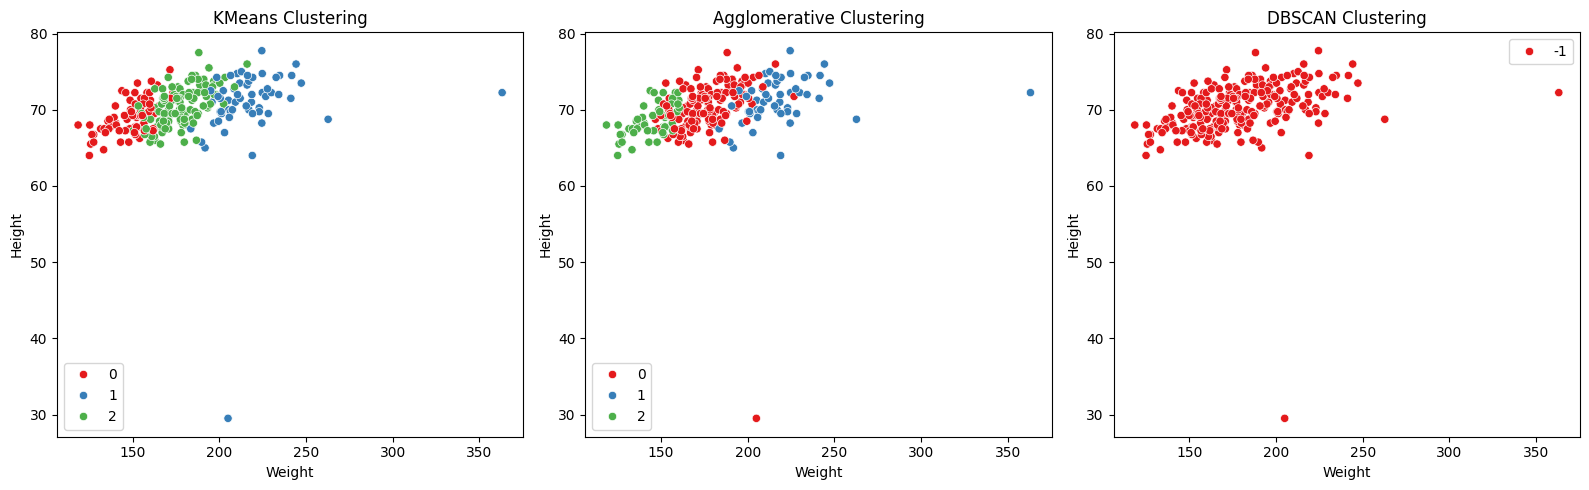

In [45]:
import matplotlib.pyplot as plt 
import seaborn as sns

# Generate cluster labels for plotting
kmeans_labels = pipeline_models['KMeans'].predict(scaled_data)
agglomerative_labels = pipeline_models['AgglomerativeClustering'].fit_predict(scaled_data)
dbscan_labels = pipeline_models['DBSCAN'].fit_predict(scaled_data)

# Plotting function
def plot_clustering_results(df, kmeans_labels, agglomerative_labels, dbscan_labels):
    plt.figure(figsize=(16, 5))

    # KMeans
    plt.subplot(1, 3, 1)
    sns.scatterplot(data=df, x='Weight', y='Height', hue=kmeans_labels, palette='Set1', legend='full')
    plt.title('KMeans Clustering')

    # Agglomerative Clustering
    plt.subplot(1, 3, 2)
    sns.scatterplot(data=df, x='Weight', y='Height', hue=agglomerative_labels, palette='Set1', legend='full')
    plt.title('Agglomerative Clustering')

    # DBSCAN
    plt.subplot(1, 3, 3)
    sns.scatterplot(data=df, x='Weight', y='Height', hue=dbscan_labels, palette='Set1', legend='full')
    plt.title('DBSCAN Clustering')

    plt.tight_layout()
    plt.savefig('files/clustering_results222.png')  # Save the plot as an image
    plt.show()

# Plot the results
plot_clustering_results(df, kmeans_labels, agglomerative_labels, dbscan_labels)
